<a href="https://colab.research.google.com/github/mddsayemm/Privacy-and-Security-With-Deep-Learning/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('Dataset.csv')
display(data)


,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247945,0,42,1,0,0,6,0,0,4,0,...,0,0,1,0,2,0,0,0,3.758289,3.323231
247946,0,42,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,3.937093,3.026987
247947,1,33,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,3.813207,3.327820
247948,1,83,1,1,19,9,0,0,7,0,...,0,0,1,0,5,0,0,0,4.540173,3.375000


In [4]:
data=pd.read_csv('Dataset.csv')
total_nulls = data.isnull().sum().sum()
print(f"There are {total_nulls} null values in the dataset.")

There are 0 null values in the dataset.


In [5]:
from sklearn.model_selection import train_test_split

# Splitting data into features and target
X = data.copy()
y = X.pop('Type')  # Assuming 'Type' is the target column
X = data.drop(columns=['Type'])  # Drop target column from features

# Step 1: Split into 80% training and 20% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, stratify=y, train_size=0.80, random_state=42
)

# Step 2: Split the temporary data into 10% validation and 10% test
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, stratify=y_temp, train_size=0.50, random_state=42
)

# Print the size of each set
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Validation Set Size: {X_valid.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")

# Input shape
input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)


Training Set Size: 198360 samples
Validation Set Size: 24795 samples
Testing Set Size: 24795 samples
Input shape is  [41]


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# Building the neural network model
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),  # Binary classification output
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy', keras.metrics.Precision(), keras.metrics.Recall()],
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Early stopping to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)


Epoch 1/200
388/388 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - binary_accuracy: 0.8398 - loss: 0.3761 - precision: 0.8611 - recall: 0.7947 - val_binary_accuracy: 0.8766 - val_loss: 0.2977 - val_precision: 0.9208 - val_recall: 0.8138
Epoch 2/200
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - binary_accuracy: 0.8771 - loss: 0.2939 - precision: 0.8925 - recall: 0.8467 - val_binary_accuracy: 0.8879 - val_loss: 0.2642 - val_precision: 0.9298 - val_recall: 0.8298
Epoch 3/200
388/388 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - binary_accuracy: 0.8823 - loss: 0.2806 - precision: 0.8981 - recall: 0.8518 - val_binary_accuracy: 0.8928 - val_loss: 0.2533 - val_precision: 0.9207 - val_recall: 0.8507
Epoch 4/200
388/388 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - binary_accuracy: 0.8854 - loss: 0.2725 - precision: 0.9012 - recall: 0.8560 - val_binary_accuracy: 0.8962 - val_loss: 0.2492 - val_precision: 0.9244 - val_recall: 0.8543
Epoch 5/200
388/388 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - binary_accuracy: 0.8895 - loss: 0.2

<Figure size 800x500 with 0 Axes>

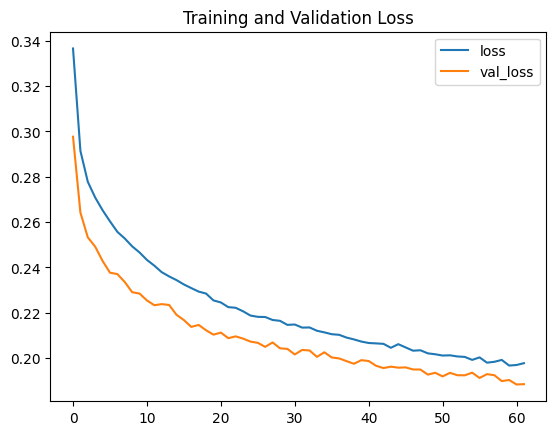

<Figure size 800x500 with 0 Axes>

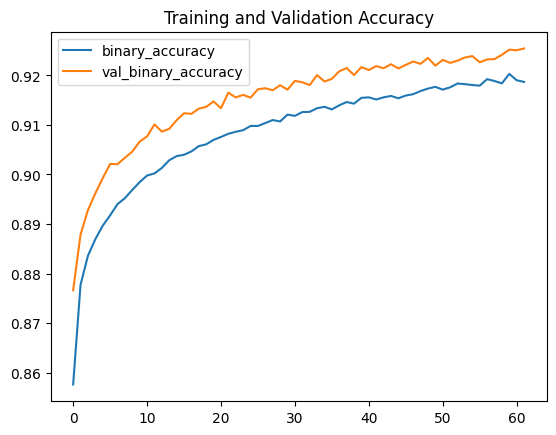


--- Best Results ---
+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
|   Best Validation Loss   | 0.18840599060058594 |
| Best Validation Accuracy |  0.9254285097122192 |
|       Best Recall        |  0.9025207161903381 |
|      Best Precision      |  0.9493273496627808 |
+--------------------------+---------------------+


In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

# Plot the training history
history_df = pd.DataFrame(history.history)

# Loss plot
plt.figure(figsize=(8, 5))
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title("Training and Validation Loss")
plt.show()

# Accuracy plot
plt.figure(figsize=(8, 5))
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
plt.title("Training and Validation Accuracy")
plt.show()

# Create PrettyTable for results
results_table = PrettyTable()

# Define the column names
results_table.field_names = ["Metric", "Value"]

# Add rows with the best results
results_table.add_row(["Best Validation Loss", history_df['val_loss'].min()])
results_table.add_row(["Best Validation Accuracy", history_df['val_binary_accuracy'].max()])
results_table.add_row(["Best Recall", history_df['val_recall'].max()])
results_table.add_row(["Best Precision", history_df['val_precision'].max()])

# Display the table
print("\n--- Best Results ---")
print(results_table)


In [24]:
# Evaluate the model on the test set
print("\n--- Testing the Model on Test Data ---")
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

# Import PrettyTable to display results in a boxed table format
from prettytable import PrettyTable

# Create a PrettyTable for the test results
test_results_table = PrettyTable()

# Define the column names for the test result table
test_results_table.field_names = ["Metric", "Value"]

# Add rows with the test results
test_results_table.add_row(["Test Loss", test_loss])
test_results_table.add_row(["Test Accuracy", test_accuracy])
test_results_table.add_row(["Test Precision", test_precision])
test_results_table.add_row(["Test Recall", test_recall])

# Display the test results table
print("\n--- Test Results ---")
print(test_results_table)



--- Testing the Model on Test Data ---
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.9172 - loss: 0.1978 - precision: 0.9337 - recall: 0.8919

--- Test Results ---
+----------------+---------------------+
|     Metric     |        Value        |
+----------------+---------------------+
|   Test Loss    | 0.19609327614307404 |
| Test Accuracy  |  0.919338583946228  |
| Test Precision |  0.9351308941841125 |
|  Test Recall   |  0.8945649266242981 |
+----------------+---------------------+


775/775 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


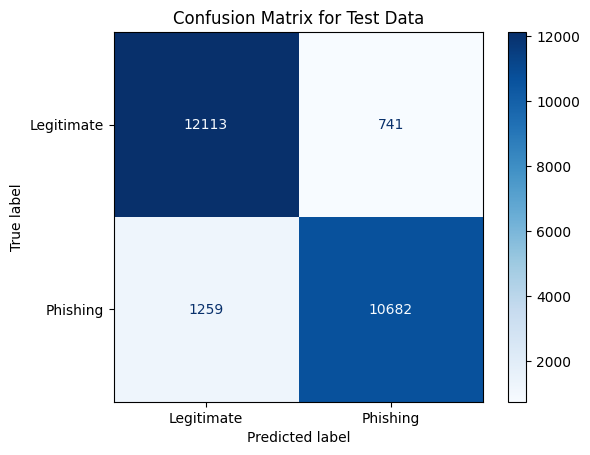

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions on the test data
y_pred_test = (model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Phishing"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Test Data")
plt.show()



Top 10 Features Based on Importance:
                                   Feature  Importance
0                               url_length   86.746689
15                           domain_length   76.944130
23                    number_of_subdomains   75.637726
29  having_special_characters_in_subdomain   74.324158
33     having_repeated_digits_in_subdomain   73.461563
24                 having_dot_in_subdomain   72.680359
25              having_hyphen_in_subdomain   72.308907
34                             having_path   70.616058
4            number_of_special_char_in_url   69.925133
28  average_number_of_hyphens_in_subdomain   68.110962


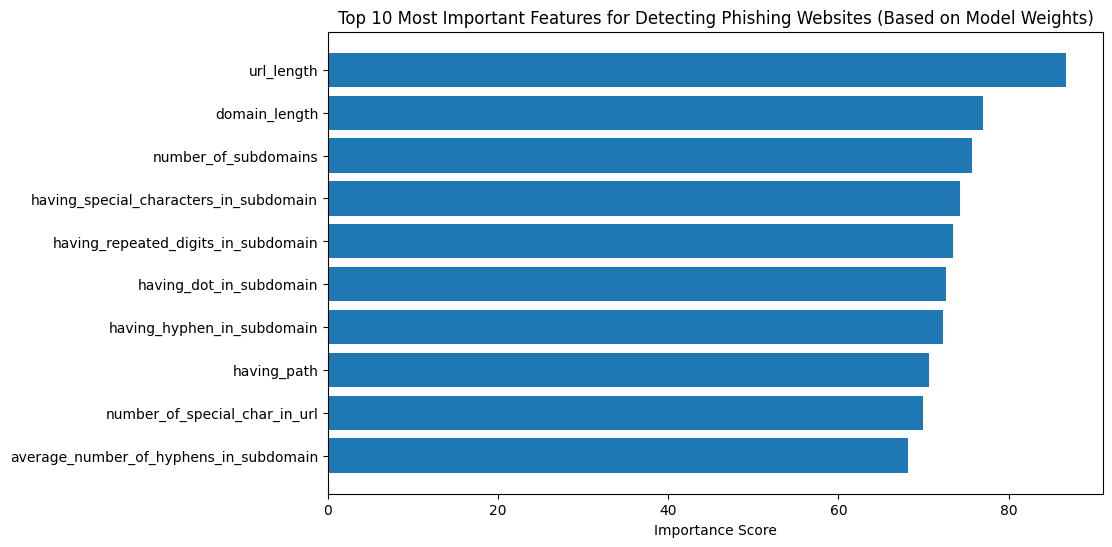

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the weights of the first layer
first_layer_weights = model.layers[1].get_weights()[0]  # First layer weights (input to first hidden layer)

# Calculate the importance based on the absolute weights of the first layer
feature_importance = np.abs(first_layer_weights).sum(axis=1)

# Create a DataFrame to associate features with their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top 10 features based on importance
print("\nTop 10 Features Based on Importance:")
print(importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Importance Score")
plt.title("Top 10 Most Important Features for Detecting Phishing Websites (Based on Model Weights)")
plt.show()
